In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

你選的這組資料為何重要?
本筆資料顯示巴西各區域以下五種燃料'ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL','ÓLEO DIESEL S10'在2004年至2019年的價格變化。

資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
kaggle上，由ANP提供。
蒐集而來的資料型態為何?
txt型態。轉入python後為dataframe型態
這組資料想解決的問題如何評估?
可能須解決的問題如下:
How different regions of Brazil saw their gas prices change?
Within a region, which states increased more their prices?
Which states are the cheapest (or most expensive) for different types of fuels?
將藉由圖表方式呈現資料以評估該資料。
評估方式如下:

In [154]:
data=pd.read_csv('.\data\\2004-2019.tsv',sep='\t')

In [155]:
type(data)

pandas.core.frame.DataFrame

In [156]:
data.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [157]:
len(data)

106823

In [158]:
del data['Unnamed: 0']

In [159]:
data.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [160]:
data.columns=[
    '起始日','結束日','宏觀區域','州','產品種類','分析的加油站數量','測量單位','平均市場價值','標準偏差',
'最低價格','最高價格','平均價格利潤','Coefficient of variation','Mean Distribution Price',
'Distribution standard deviation','Distribution Min Price',
'Distribution Max Price','Distributions coefficient of variation','Month','year'
]

In [161]:
data['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

In [162]:
data['產品種類'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

In [163]:
df1=data.groupby(data['產品種類'])

In [167]:
df1.groups['ETANOL HIDRATADO']

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            106690, 106691, 106692, 106693, 106694, 106695, 106696, 106697,
            106698, 106699],
           dtype='int64', length=21102)

In [165]:
df1.groups['ETANOL HIDRATADO']

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            106690, 106691, 106692, 106693, 106694, 106695, 106696, 106697,
            106698, 106699],
           dtype='int64', length=21102)

In [152]:
df2=data[['起始日','州','產品種類','平均市場價值']]

In [217]:
df2.head()

,起始日,州,產品種類,平均市場價值
0,2004-05-09,DISTRITO FEDERAL,ETANOL HIDRATADO,1.288
1,2004-05-09,GOIAS,ETANOL HIDRATADO,1.162
2,2004-05-09,MATO GROSSO,ETANOL HIDRATADO,1.389
3,2004-05-09,MATO GROSSO DO SUL,ETANOL HIDRATADO,1.262
4,2004-05-09,ALAGOAS,ETANOL HIDRATADO,1.181


In [218]:
df2['產品種類'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

In [282]:
gas=df2.groupby(['產品種類'])

In [284]:
gas1=gas.get_group('ETANOL HIDRATADO')

In [290]:
gas11=gas1.groupby(['州'])

In [296]:
df2['州'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [301]:
x=['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA']

Text(0.5, 1.0, 'ETANOL HIDRATADO')

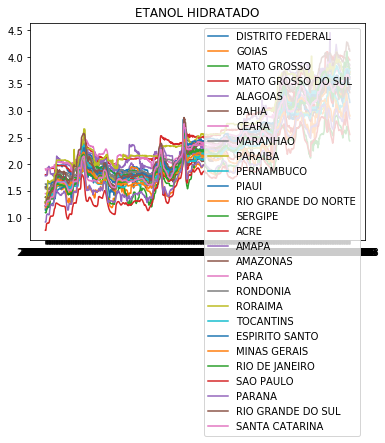

In [326]:
for i in range(len(x)):
    plt.plot(gas11.get_group(x[i])['起始日'],gas11.get_group(x[i])['平均市場價值'],label=x[i])
plt.legend()
plt.title('ETANOL HIDRATADO')

作業3：申論題目可直接將答案回覆在HW檔案裡面，Jupyter notebook可直接編輯文字。

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
假設特定時段、特定區域的搭車需求較高，則提升該時段、該區域的車輛密度，

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
資料自車隊app中蒐集。

3. 蒐集而來的資料型態為何
應該是複合型資料，這題我不太會回答。
4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
車隊gps會有乘客上車地點的資料，透過這個資料，我們可以知道哪裡是載客熱點，而在載客熱點區域，統計乘客叫車--車子抵達的所花費的時間，假設該熱點等車時間長，則可增加車輛。另外，統計時應就假日、平日(一到四)、週五、連續假期等、時間(早中晚)等等種類分別統計。
